# HW4 – Statistics and Data Analysis
### Differential Gene Expression in Acute Myocardial Infraction 

<center> 
    Student IDs: 204818181, 329827190
    </center>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 

## Introduction

Gene expression describes the process in which genes that are coded in the DNA of living organisms are transcribed into mRNA. This is part of the bigger process in which genes are being copied (transcribed), processed, translated and modified into the final product, usually a protein. Gene expression profiling measures the levels at which mRNA molecules pertaining to the genes profiled are observed in a sample.
In this exercise, we will perform guided analysis, comparing expression profiles of circulating endothelial cells (CECs) in patients with acute myocardial infraction to CECs in healthy controls. A comparison of two sample classes. You will then select one more gene expression dataset and perform your own analysis there.


## Data

The data set was taken from:

1)	Dataset record in NCBI:
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE66360

2)	Published paper: Muse et al, Sci Rep 2017 https://www.nature.com/articles/s41598-017-12166-0

We extracted the data matrix and provide it as a separate csv attachment (link to download - https://drive.google.com/file/d/1-mu1J2wnlDIVNzoCXw20jJQ9r-h1jGrZ/view ). The csv file needs to be pre-processed before moving to the main analysis steps. Some information should be removed but make sure that you keep all information that is important for the analysis.
The paper describes a study that seeks to develop an expression-based signature that can detect AMI in patients in a non-invasive manner, by profiling CECs. 


In [2]:
# Skipped the first 60 rows of data as they are invalid
dataset = pd.read_csv("data.csv", skiprows=58, low_memory=False)

In [3]:
# Setting up data DataFrame
header = dataset.iloc[0]
data = dataset[1:] 
data.columns = header
data

,Class,H,H,H,H,H,H,H,H,H,...,M,M,M,M,M,M,M,M,M,M
1,ID_REF,GSM1620819,GSM1620820,GSM1620821,GSM1620822,GSM1620823,GSM1620824,GSM1620825,GSM1620826,GSM1620827,...,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
2,1007_s_at,5.866377893,4.948736331,5.148384393,5.064418945,5.017832878,5.116153518,5.431328058,5.235270857,5.773528455,...,5.419481538,5.057716465,5.996493392,5.343132759,5.558892254,6.472517225,5.678815851,5.653286378,6.013841046,5.465333944
3,1053_at,8.22579012,7.525865369,7.764636529,7.198461482,7.831450258,7.203591859,7.694550756,7.760259212,8.279814404,...,7.226347747,7.105537863,5.354105386,8.271499725,5.96334574,8.261421952,6.925752665,7.918424183,7.442701377,9.225221352
4,117_at,6.17973231,6.628137025,5.859151477,5.974135101,6.793079158,6.43522914,6.320546126,6.48359047,6.387779205,...,6.789500767,7.441939912,7.026928573,6.003972814,7.474325713,6.367759272,6.835755831,7.577034915,7.147417202,6.48112813
5,121_at,6.179477974,6.58288903,6.602134766,6.545904723,5.911542321,6.28542026,6.562315839,6.345887555,6.27280582,...,6.513436777,6.317522639,7.413453376,6.809103167,5.949091368,6.440978114,6.955883278,6.499215058,6.587065112,6.897590966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54672,AFFX-ThrX-5_at,3.139333661,3.039961017,3.220109351,3.263781541,3.138524252,3.043078536,3.231107638,3.304715967,3.384011442,...,3.525011316,3.309030335,3.663399948,3.32400503,4.619261018,5.558780351,3.416999272,3.699181146,3.48527965,4.211921779
54673,AFFX-ThrX-M_at,2.7470148,2.63860588,2.495261011,2.544198973,2.506629527,2.817981885,2.525060286,2.91727791,2.643849254,...,2.930794418,2.745955351,3.165167607,2.899104156,4.066775612,5.429436708,2.834741433,3.24968301,2.71141329,3.346834702
54674,AFFX-TrpnX-3_at,2.651554479,2.643615067,2.626028059,2.504957719,2.609707404,2.521610278,2.840601479,2.509774164,2.696820467,...,2.788852359,2.725246769,3.143400613,2.76875475,3.546116866,4.487940292,2.782355764,3.056726837,2.833818355,3.06954169
54675,AFFX-TrpnX-5_at,3.413429017,3.399062751,3.539969696,3.396225335,3.43472012,3.516089622,3.514949337,3.475952299,3.495198562,...,3.701271488,3.456716807,4.127459216,3.668326993,4.889324389,4.254285925,3.882079933,3.649826789,3.523410023,4.108475085


## Analysis

### A.	High level description of the data and some pre-processing

1)	How many genes profiled? 

In [4]:
print('There are {} profiled genes'.format(data.shape[0] - 1))

There are 54675 profiled genes


2)	How many samples (subjects/patients) in total?

In [5]:
print('There are {} patients'.format(data.shape[1] - 1))

There are 99 patients


3)	How many samples in each class?

In [6]:
# We will transpose this data so it makes more sense to work with. 
# We want to have the gene names as headers and each row will be a patient with a class value

transpose_temp = data.transpose()
transpose_temp = transpose_temp.reset_index()
transpose_header = transpose_temp.iloc[0]
transpose_data = transpose_temp[1:] 
transpose_data.columns = transpose_header

transpose_data

,Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
1,H,GSM1620819,5.866377893,8.22579012,6.17973231,6.179477974,2.792047952,9.290410779,6.998285145,5.348943925,...,13.25732501,13.26623454,14.57122985,14.27656808,4.504659469,3.139333661,2.7470148,2.651554479,3.413429017,3.140611771
2,H,GSM1620820,4.948736331,7.525865369,6.628137025,6.58288903,2.69571445,9.462275035,6.558214949,5.410884095,...,13.59386023,13.51701336,14.73883363,14.34123318,4.409225776,3.039961017,2.63860588,2.643615067,3.399062751,3.132691213
3,H,GSM1620821,5.148384393,7.764636529,5.859151477,6.602134766,2.580181122,9.116776316,6.851622539,5.254073031,...,13.37275868,13.41658291,14.62718054,14.31856805,4.310075612,3.220109351,2.495261011,2.626028059,3.539969696,3.698396097
4,H,GSM1620822,5.064418945,7.198461482,5.974135101,6.545904723,2.712123845,9.134584186,7.357827486,5.242139865,...,13.49022556,13.49482728,14.75412393,14.3632965,4.439310699,3.263781541,2.544198973,2.504957719,3.396225335,3.638611866
5,H,GSM1620823,5.017832878,7.831450258,6.793079158,5.911542321,2.723686912,9.582343511,7.283872601,5.219483996,...,13.23678545,13.33019244,14.54838931,14.26367675,4.562883241,3.138524252,2.506629527,2.609707404,3.43472012,3.577649067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,M,GSM1620913,6.472517225,8.261421952,6.367759272,6.440978114,3.73013912,7.355729877,6.206879166,6.217929861,...,6.601745953,5.94230757,7.290513508,8.988510881,5.567947288,5.558780351,5.429436708,4.487940292,4.254285925,5.375810973
96,M,GSM1620914,5.678815851,6.925752665,6.835755831,6.955883278,2.914867562,7.944294937,6.638364166,5.992343792,...,14.2710373,14.16370633,14.88450605,14.79250553,4.902195229,3.416999272,2.834741433,2.782355764,3.882079933,3.744138165
97,M,GSM1620915,5.653286378,7.918424183,7.577034915,6.499215058,3.013901455,8.563122679,7.379567509,5.766028609,...,13.89861618,13.68242475,14.88450605,14.78380144,5.239906199,3.699181146,3.24968301,3.056726837,3.649826789,4.021536308
98,M,GSM1620916,6.013841046,7.442701377,7.147417202,6.587065112,2.729319786,8.699221635,6.598349589,5.577456268,...,13.84700646,13.55159338,14.85806628,14.7781659,4.556134169,3.48527965,2.71141329,2.833818355,3.523410023,3.81256443


In [7]:
print('There {0} Healthy (H) and {1} Sick (M)'.format(list(transpose_data["Class"].value_counts())[0],list(transpose_data["Class"].value_counts())[1]))

There 50 Healthy (H) and 49 Sick (M)


4)	If there are missing values, then remove the entire row (gene) from the data matrix. How many rows left now?

In [8]:
clean_transpose_data = transpose_data.dropna(how='any', axis=1, inplace=False)
print('Th#ere are {} genes'.format(clean_transpose_data.shape[1] - 2))

Th#ere are 54628 genes


### B.	WRS for differential expression (DE)

1)	Consider some gene, g. Under the null model (which assumes that for g there is no M vs H DE), what is the expected sum of ranks of g’s expression levels measured for samples labeled M?

$$E[RS(g)]= \frac{B(N+1)}{2} = \frac{B(M_{count} +1)}{2} = \frac{49·100}{2} =2450$$

2)	Denote this sum of ranks by RS(g). What is the minimal value, m, that RS(g) can take?

_We will take the sum of the first $49$ ranks assuming that all the ranks are uniformly distributed_
$$ \sum^{49}_{i=1} RS(g) = \frac{n(n+1)}{2} =\frac{49(50)}{2} = 1225 $$

3)	Under the null model, what is the probability of RS(g) = m? 
(provide a formula for this and explain it)

_In the null hypothesis, all genes have the same probability to get any rank. As we are looking at the sick patients, we have $49$ patients whos rank we are looking at. Overall, there are  $ {99 \choose 49} $ ranks to choose. As we are assuming there is an equal chance to get a ranks then:_
$$ P[RS(g) = m] = \frac{1}{{99 \choose 49}} $$

4)	Under the null model, what is the probability of RS(g) = m+1? what is the probability of RS(g) = m+2? 
(provide formulas and explain them)

_Under the null model, for $RS(g) = m + 1 $, we have the same answer as above as we increased the rank by 1 and replace the 49th rank with 49+1th rank_
$$ P[RS(g) = m] = \frac{1}{{99 \choose 49}} $$

_For $RS(g) = m + 2 $, we have two possibilities, replacing the rank of 49 with 51 or of 48 to 50, thus:_
$$ P[RS(g) = m] = \frac{2}{{99 \choose 49}} $$

5)	Draw a histogram of the values of RS(g) in the dataset. Here g ranges over all genes in the data (after the clean-up)

In [9]:
def rank_sum(gene):
    rank = gene.rank()
    ## We only want class M
    return (rank[clean_transpose_data['Class'] == "M"].sum())


ranked_data = clean_transpose_data.iloc[:,2:].apply(rank_sum, axis=0)

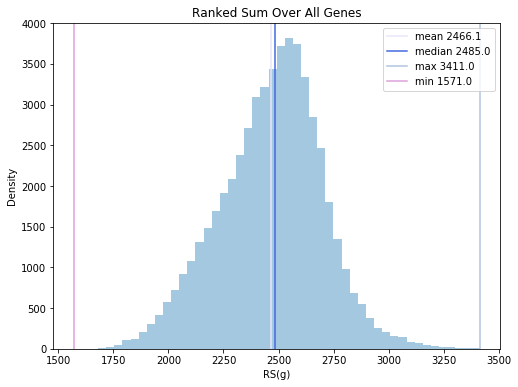

In [11]:
plt.figure(figsize=(8,6))
sns.distplot(ranked_data, kde = False)
plt.title("Ranked Sum Over All Genes")
plt.ylabel("Density")
plt.xlabel("RS(g)")
plt.axvline(ranked_data.mean(),label="mean {:0.1f}".format(ranked_data.mean()),color = "lavender")
plt.axvline(ranked_data.median(),label="median {:0.1f}".format(ranked_data.median()), color = "royalblue")
plt.axvline(ranked_data.max(),label="max {}".format(ranked_data.max()), color = "lightsteelblue")
plt.axvline(ranked_data.min(),label="min {}".format(ranked_data.min()), color = 'plum')
plt.legend()
plt.show()


### C. Differential Expression
The purpose is to determine the statistical significance of differential expression (DE) observed for each gene in H vs M.
Evaluate the DE in both one-sided directions for every gene, using both Student t-test and WRS test. 
Report the number of genes overexpressed in M vs H at a p-value better (≤) than 0.05 and separately genes underexpressed in M vs H at a p-value of 0.05. For both directions use both a Student t-test and a WRS test.



In [12]:
# Because of single side and double sided tail we need to define alpha as follows
alpha = 0.05 * 2
# we will be working on this data set because we dont want the 'Class' and 'ID_Ref' columns
clean_transpose_data.iloc[:,2:]

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
1,5.866377893,8.22579012,6.17973231,6.179477974,2.792047952,9.290410779,6.998285145,5.348943925,10.742427,7.270560667,...,13.25732501,13.26623454,14.57122985,14.27656808,4.504659469,3.139333661,2.7470148,2.651554479,3.413429017,3.140611771
2,4.948736331,7.525865369,6.628137025,6.58288903,2.69571445,9.462275035,6.558214949,5.410884095,9.865655308,4.810194735,...,13.59386023,13.51701336,14.73883363,14.34123318,4.409225776,3.039961017,2.63860588,2.643615067,3.399062751,3.132691213
3,5.148384393,7.764636529,5.859151477,6.602134766,2.580181122,9.116776316,6.851622539,5.254073031,10.148454,7.822844272,...,13.37275868,13.41658291,14.62718054,14.31856805,4.310075612,3.220109351,2.495261011,2.626028059,3.539969696,3.698396097
4,5.064418945,7.198461482,5.974135101,6.545904723,2.712123845,9.134584186,7.357827486,5.242139865,10.87991277,5.690417407,...,13.49022556,13.49482728,14.75412393,14.3632965,4.439310699,3.263781541,2.544198973,2.504957719,3.396225335,3.638611866
5,5.017832878,7.831450258,6.793079158,5.911542321,2.723686912,9.582343511,7.283872601,5.219483996,10.09052505,7.089369391,...,13.23678545,13.33019244,14.54838931,14.26367675,4.562883241,3.138524252,2.506629527,2.609707404,3.43472012,3.577649067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6.472517225,8.261421952,6.367759272,6.440978114,3.73013912,7.355729877,6.206879166,6.217929861,5.375997385,6.133231971,...,6.601745953,5.94230757,7.290513508,8.988510881,5.567947288,5.558780351,5.429436708,4.487940292,4.254285925,5.375810973
96,5.678815851,6.925752665,6.835755831,6.955883278,2.914867562,7.944294937,6.638364166,5.992343792,9.613538724,3.89680742,...,14.2710373,14.16370633,14.88450605,14.79250553,4.902195229,3.416999272,2.834741433,2.782355764,3.882079933,3.744138165
97,5.653286378,7.918424183,7.577034915,6.499215058,3.013901455,8.563122679,7.379567509,5.766028609,9.312493837,5.545193595,...,13.89861618,13.68242475,14.88450605,14.78380144,5.239906199,3.699181146,3.24968301,3.056726837,3.649826789,4.021536308
98,6.013841046,7.442701377,7.147417202,6.587065112,2.729319786,8.699221635,6.598349589,5.577456268,9.617118255,4.14747677,...,13.84700646,13.55159338,14.85806628,14.7781659,4.556134169,3.48527965,2.71141329,2.833818355,3.523410023,3.81256443


##### T-Test ####

In [13]:
def calc_ttest(gene):
    ## defining the two independent samples
    a = gene[clean_transpose_data['Class'] == "M"].astype("float")
    b = gene[clean_transpose_data['Class'] == "H"].astype("float")
    return stats.ttest_ind(a,b)

ttest_data = clean_transpose_data.iloc[:,2:].apply(calc_ttest, axis=0,result_type="expand")

In [14]:
ttest_data

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,-1.278585,0.447602,4.041393,0.102599,0.481005,-1.25881,-2.885473,2.406316,-2.154836,-4.055713,...,-0.616825,-0.838321,-0.598171,-0.755246,2.221230,1.108412,0.961627,1.051736,0.617371,1.471453
1,0.204094,0.655439,0.000106,0.918493,0.631596,0.21112,0.004817,0.018008,0.033650,0.000101,...,0.538795,0.403911,0.551120,0.451931,0.028661,0.270425,0.338628,0.295534,0.538437,0.144406


In [15]:
# Defining overexpressed and underexpressed genes
ttest_overexpressed = ttest_data.T[(ttest_data.T.iloc[:,0] >= 0) & (ttest_data.T.iloc[:,1] < alpha)]
ttest_underexpressed = ttest_data.T[(ttest_data.T.iloc[:,0] < 0) & (ttest_data.T.iloc[:,1] < alpha)]

In [16]:
print("Using T-Test \nOverexpressed Genes: {} \nUnderexpressed Genes: {}"
      .format(ttest_overexpressed.shape[0],ttest_underexpressed.shape[0]))

Using T-Test 
Overexpressed Genes: 7067 
Underexpressed Genes: 7467


##### WRS ####

In [21]:
def calc_wrs(gene):
    ## defining the two independent samples
    a = gene[clean_transpose_data['Class'] == "M"]
    b = gene[clean_transpose_data['Class'] == "H"]
    return stats.ranksums(a,b)

wrs_data = clean_transpose_data.iloc[:,2:].apply(calc_wrs, axis=0, result_type="expand")

In [22]:
wrs_data

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,-1.021787,1.077775,3.590252,0.629869,1.035784,-0.993793,-3.079359,1.686649,1.728640,-3.681233,...,0.720850,0.566882,1.011289,1.525682,2.365507,2.281525,2.204541,1.574672,1.469694,1.672652
1,0.306882,0.281134,0.000330,0.528780,0.300303,0.320324,0.002074,0.091671,0.083874,0.000232,...,0.471002,0.570794,0.311878,0.127089,0.018005,0.022517,0.027486,0.115332,0.141645,0.094396


In [23]:
# Defining overexpressed and underexpressed genes
wrs_overexpressed = wrs_data.T[(wrs_data.T.iloc[:,0] > 0) & (wrs_data.T.iloc[:,1] < alpha)]
wrs_underexpressed = wrs_data.T[(wrs_data.T.iloc[:,0] <= 0) & (wrs_data.T.iloc[:,1] < alpha)]

In [24]:
print("Using WRS \nOverexpressed Genes: {} \nUnderexpressed Genes: {}"
      .format(wrs_overexpressed.shape[0],wrs_underexpressed.shape[0]))

Using WRS 
Overexpressed Genes: 8507 
Underexpressed Genes: 8168


### D.	Correlations
Select the 60 most significant genes from each one of the one-sided WRS DE lists you computed in 3c. Generate a set of 120 genes, D, which is the union of the above two sets.
Compute Spearman rho correlations in all pairs within D (120 choose 2 numbers). 

1)	What can you report about co-expression of genes in D (co-expression is inferred from the correlation of the expression levels of genes, across a set of samples)? Do we observe any significant co-expression? If so how many pairs, etc.

In [25]:
significantly_underexpressed = wrs_overexpressed.sort_values(by=wrs_underexpressed.columns[1]).head(60)
significantly_overexpressed = wrs_underexpressed.sort_values(by=wrs_overexpressed.columns[1]).head(60)
# print(significantly_underexpressed)
# print(significantly_overexpressed)
D = significantly_underexpressed.append(significantly_overexpressed)
print(D)

                    0             1
0                                  
201859_at    6.725599  1.748716e-11
202464_s_at  6.634618  3.253441e-11
217202_s_at  6.480650  9.132830e-11
235536_at    6.480650  9.132830e-11
215001_s_at  6.480650  9.132830e-11
...               ...           ...
225031_at   -4.801000  1.578754e-06
236497_at   -4.794001  1.634872e-06
225387_at   -4.787003  1.692905e-06
239179_at   -4.780004  1.752915e-06
228908_s_at -4.773006  1.814966e-06

[120 rows x 2 columns]


In [26]:
gene_id = list(D.index.values)

In [27]:
D = clean_transpose_data[D.index].astype("float")
D_spearman_corr = D.corr()

_We choose the 60 most significant genes, hence when graphing the heatmap to look roughly symmetric. 
We expect to see a high positive correlation between strong expressed genes and a low negative correlation between low expressed genes._

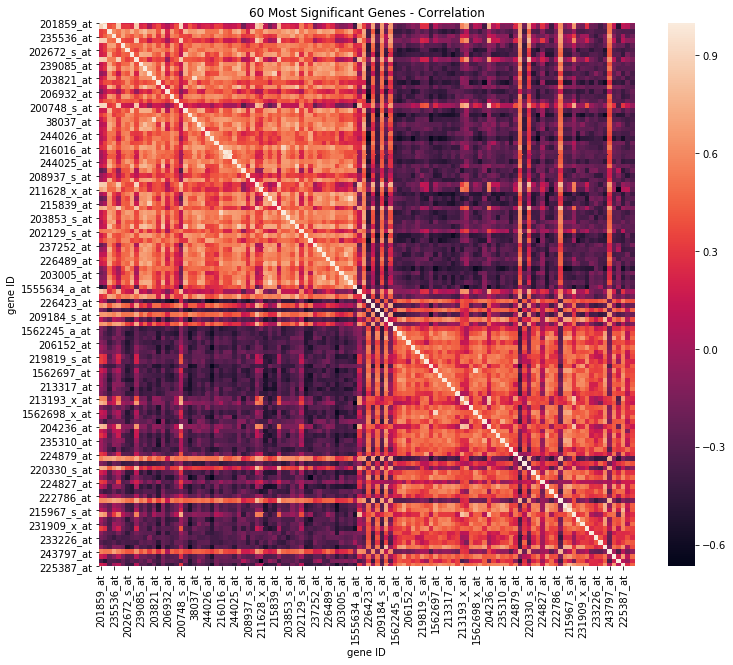

In [35]:
plt.figure(figsize = (12,10))
sns.heatmap(D_spearman_corr)

plt.title("60 Most Significant Genes - Correlation")
plt.xlabel("gene ID")
plt.ylabel("gene ID")
plt.show()

2)	What would have been advantages and disadvantages of computing co-expression for all genes in the study rather than only for genes in D? 

_Consider the case where we compute the co-expression for all gene pairs and not the 60 most signigicant gene pairs. As we are tying to find the gene pairs that are strongly correlated (positively or negatively), computing the differential expression between all gene pairs would take a long time. In our data there are 54675 genes, looking at every pair, that would take almost 3 trillion calculations, a great disadvantage.  
Thus we choose the most expressed gene pairs and examin the correlations between them._

3)	Perform the above steps on the same set D, but restrict attention only to samples labeled M. What do you see now? Can you explain this?


_In order to restrict the attention only to the samples labled M, we will remove all the samples labled H. 
We are expecting to see weaker correlation because we will be choosing genes with high differential expression in healty and sick patients. Removing the healthy people will result in a weaker correlation than a stronger one with the healthy patients_

_We will present the findings below_

In [38]:
def calculate_corr_pvalue(data):
    col_num = len(data.columns)
    corr = np.empty([col_num, col_num])
    p_vals = np.empty([col_num, col_num])
    for i in range(col_num):
        for j in range(col_num):
            corr_i_j, p_val_i_j = stats.spearmanr(data.iloc[:,i],data.iloc[:,j])
            corr[i,j] = corr_i_j
            p_vals[i,j] = p_val_i_j
    
    return corr, p_vals


num_pairs = D_spearman_corr.shape[0]
M_spearman_corr , M_pvalues =  calculate_corr_pvalue(D)

a,b = M_pvalues.shape
M_pvalues = M_pvalues.reshape(a*b)

sig_M_p_vals = M_p_vals[np.where(M_pvalues < alpha)]
M_num_of_sig_pairs = (len(sig_M_p_vals) - 120) / 2

print("Out of {} total pairs. ".format(int(num_pairs)))
print("Significant co-expressed gene pairs: {}".format(M_num_of_sig_pairs))
print("{}% of the pairs are Significant".format(round(M_num_of_sig_pairs/num_pairs,2)*100))

Total pairs: 120
Significant co-expressed gene pairs: 6835.0
5696.0% of the pairs are Significant


### E.	Plots and Conclusions of the DE and correlation analysis

1)	Construct the DE overabundance plots (blue and green lines as shown in class) for M vs H overexpression (higher expression levels in M) using WRS and t-test using the results you had computed in Section 3c. 
State, for each comparison, the number of genes, k, at which we observe:

     a)	FDR = 0.1
     b)	FDR = 0.05
     c)	FDR = 0.001

If these events are not observed at any k, then make that statement.

##### WRS ####

In [155]:
overabundance_wilx_df = wilcoxon_results.filter(['p_val', 'z_val'], axis=1).astype("float")
overabundance_wilx_df['z_val'] = overabundance_wilx_df['z_val'].abs()
overabundance_wilx_df['p_val'] = 2*overabundance_wilx_df['p_val']
overabundance_wilx_df['expected'] = overabundance_wilx_df['p_val']* wilcoxon_results.shape[0]
overabundance_wilx_df['actual'] = overabundance_wilx_df['z_val'].rank(ascending = False)
ax = overabundance_wilx_df[['expected', 'actual', 'p_val']]
ax = ax.sort_values(by='p_val').plot(x='p_val',logx=True, title='WRS overabundance',figsize=(8,5))
plt.ylabel("# of genes")
plt.show()

NameError: name 'wilcoxon_results' is not defined

In [156]:
wilx_pvals = overabundance_wilx_df['p_val']

NameError: name 'overabundance_wilx_df' is not defined

In [157]:
plt.figure(figsize=(8,5))
plt.scatter(wilx_pvals, wilx_pvals * wilx_pvals.size, label="expected", marker='.')
plt.scatter(wilx_pvals, wilx_pvals.rank(), label="Actual", c='g',  marker='.')

plt.title('P_val distribution')
plt.legend()
plt.show()

NameError: name 'wilx_pvals' is not defined

<Figure size 576x360 with 0 Axes>

In [ ]:
wilx_frd_df = wilx_pvals * wilx_pvals.size / wilx_pvals.rank()

In [ ]:
fdrs = [0.1, 0.05, 0.001]

print('For wilcoxon DE:\n')
for fdr in fdrs:
    print('The number of the genes, which we observe with FDR {}: {}'
          .format(fdr,wilx_frd_df[wilx_frd_df.values <= fdr].count()))



##### T-Test ####

In [ ]:
#number of genes
ttest_results.shape[0]

In [ ]:
overabundance_ttest_df = ttest_results.filter(['p_val', 'z_val'], axis=1).astype("float")
overabundance_ttest_df['z_val'] = overabundance_ttest_df['z_val'].abs()
overabundance_ttest_df['p_val'] = 2*overabundance_ttest_df['p_val']
overabundance_ttest_df['expected'] = overabundance_ttest_df['p_val']* ttest_results.shape[0]
overabundance_ttest_df['actual'] = overabundance_ttest_df['z_val'].rank(ascending = False)
ax = overabundance_ttest_df[['expected', 'actual', 'p_val']]
ax = ax.sort_values(by='p_val').plot(x='p_val',logx=True, title='T-TEST overabundance',figsize=(8,5))
plt.ylabel("# of genes")
plt.show()

In [ ]:
ttest_pvals = overabundance_ttest_df['p_val']

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(ttest_pvals, ttest_pvals * ttest_pvals.size, label="expected", marker='.')
plt.scatter(ttest_pvals, ttest_pvals.rank(), label="Actual", c='g',  marker='.')
plt.title('P_val distribution')
plt.legend()
plt.show()

In [ ]:
ttest_frd_df = ttest_pvals * ttest_pvals.size / ttest_pvals.rank()

In [ ]:
print('For ttest DE:\n')
for fdr in fdrs:
    print('The number of the genes, which we observe with FDR {}: {}'
          .format(fdr, ttest_frd_df[ttest_frd_df.values <= fdr].count()))

2)	What can you say about the difference in results obtained in WRS vs those obtained by Student t-test?

 WeseethatWRSprovidesuswithmuchmoregenesthathavelowFDR.ThismeansthatWRSgivesusbetter p-values, as it does not assume normal distribution.

3)	Select any 3 differentially expressed genes, from D (which was defined in 3d), and produce a graphical representation of their expression patterns that demonstrates the observed DE.


In [ ]:
# random smaple taken
rndom_samples_df = D_.T.sample(n=3)
rndom_samples_df = rndom_samples_df.T
genes_ = rndom_samples_df.columns
DE_h = h_data[genes_]
DE_m = m_data[genes_]

# the genes choosen
list(genes_)

for g in genes_:
    ax_ = DE_h[g]
    ax2 = DE_m[g]
    ax2.plot(kind='density',figsize=(8,5))
    ax_.plot(kind='density',figsize=(8,5))
    plt.title(g)
    plt.xlabel("DE")
    plt.legend(['H', 'M'])
    plt.show()

4)	Heatmap - Draw a heatmap representation of the expression values of the genes in D (from 3d), across the entire cohort (all samples). Order the genes and the samples to produce the maximal visual effect.


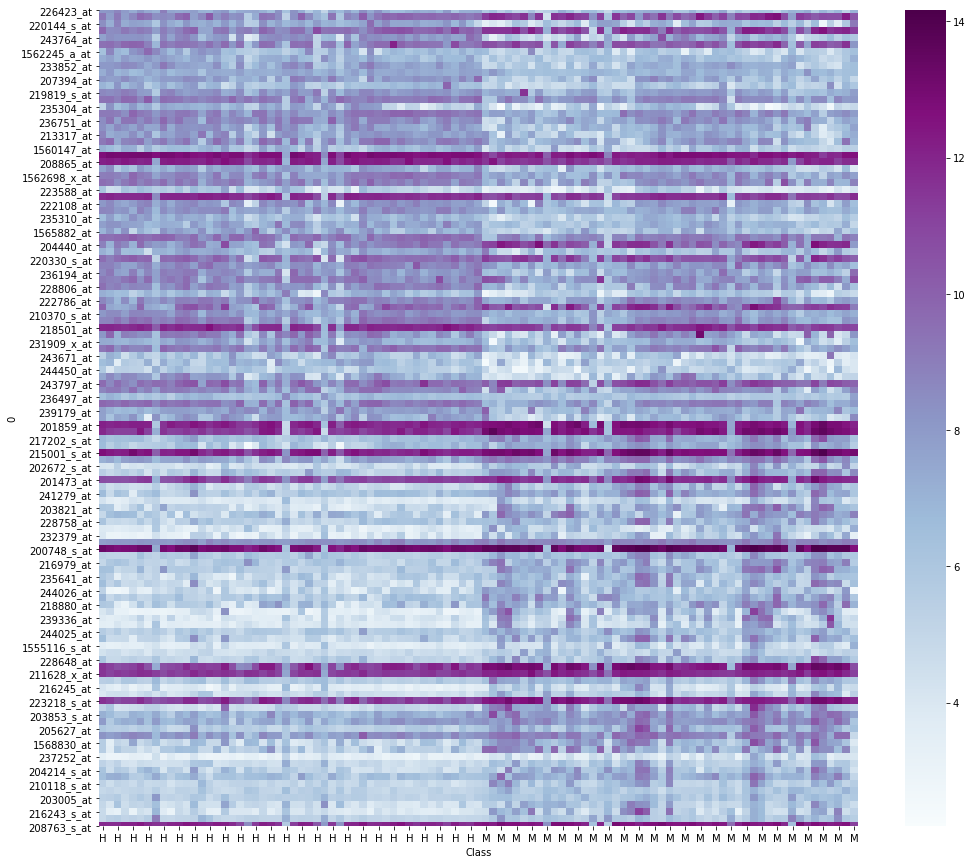

In [158]:
# fix data for heatmap representation
D_heatmap = D_heatmap.T
classes_ = D_heatmap.iloc[0]
D_heatmap = D_heatmap[1:]
D_heatmap.columns = classes_
plt.figure(figsize = (17,15))
sns.heatmap(D_heatmap.sort_values('Class', axis=1).astype('float'),cmap="BuPu");

In [159]:
x = np.random.randint(60,100, size=100)
y = np.random.randint(0,50, size=100)

x1 = np.random.randint(110,150, size=100)
y2 = np.random.randint(60,110, size=100
                       
plt.scatter(x,y, marker='x', label='Healthy')
plt.scatter(x1,y2, marker= 'v', label='Sick')
plt.legend()


SyntaxError: invalid syntax (<ipython-input-159-544244e9a995>, line 7)